In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

##### Information about the data set:

##### loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the  loan amount, then it will be reflected in this value.
##### term : The number of payments on the loan. Values are in months and can be either 36 or 60.
##### int_rate : Interest Rate on the loan
##### installment : The monthly payment owed by the borrower if the loan originates.
##### grade LC : assigned loan grade
##### sub_grade LC : assigned loan subgrade
##### emp_title : The job title supplied by the Borrower when applying for the loan.
##### emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or  more years.
##### home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report. Our  values are: RENT, OWN, MORTGAGE, OTHER
##### annual_inc : The self-reported annual income provided by the borrower during registration.
##### verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified
##### issue_d : The month which the loan was funded
##### loan_status : Current status of the loan
##### purpose : A category provided by the borrower for the loan request.
##### title : The loan title provided by the borrower
##### zip_code : The first 3 numbers of the zip code provided by the borrower in the loan application.
##### addr_state : The state provided by the borrower in the loan application
##### dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the  requested LC loan, divided by the borrower’s self-reported monthly income.
##### earliest_cr_line : The month the borrower's earliest reported credit line was opened
##### open_acc : The number of open credit lines in the borrower's credit file.
##### pub_rec : Number of derogatory public records
##### revol_bal : Total credit revolving balance
##### revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving  credit.
##### total_acc : The total number of credit lines currently in the borrower's credit file
##### initial_list_status : The initial listing status of the loan. Possible values are – W, F
##### application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
##### mort_acc : Number of mortgage accounts.
##### pub_rec_bankruptcies : Number of public record bankruptcies

In [3]:
loan = pd.read_csv("logistic_regression.csv")
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
loan.shape

(396030, 27)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
loan.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [8]:
loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [9]:
## Checking for class imbalance
loan["loan_status"].value_counts(normalize = True)

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64

In [10]:
loan.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [11]:
df_corr = loan.select_dtypes(include = 'float64')
df_corr

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.0,0.0


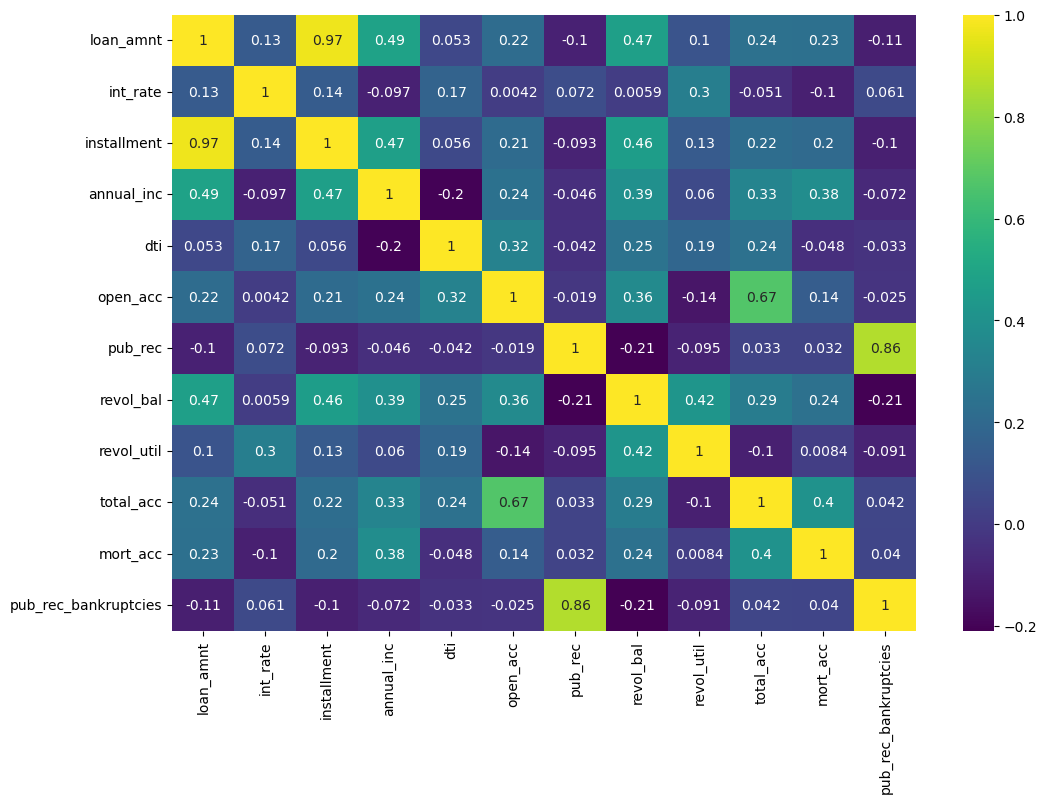

In [12]:
# Checking Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(method = 'spearman'), annot=True, cmap='viridis')
plt.show()

### We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

#### installment: The monthly payment owed by the borrower if the loan originates.
#### loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
### So, we can drop either one of those columns.

In [14]:
loan.drop("installment",axis = 1, inplace = True)

In [15]:
df_corr = loan.select_dtypes(include = 'float64')
df_corr

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0
396026,21000.0,12.29,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0
396027,5000.0,9.99,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0
396028,21000.0,15.31,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.0,0.0


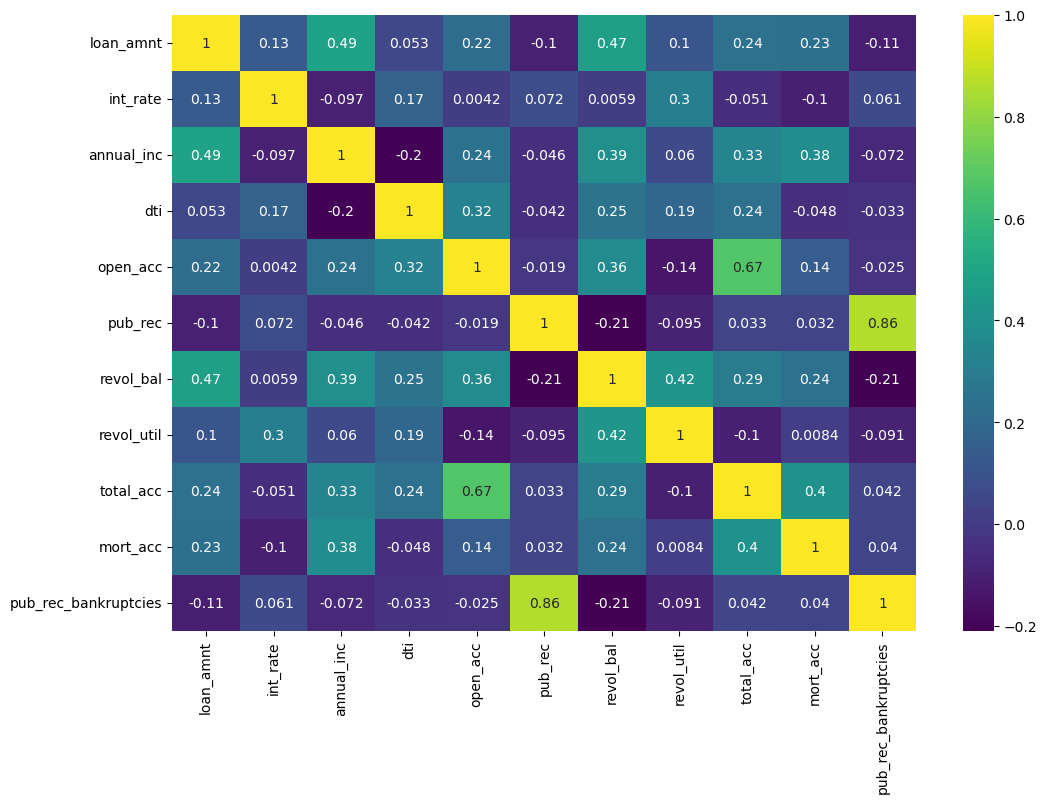

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(method = 'spearman'), annot=True, cmap='viridis')
plt.show()

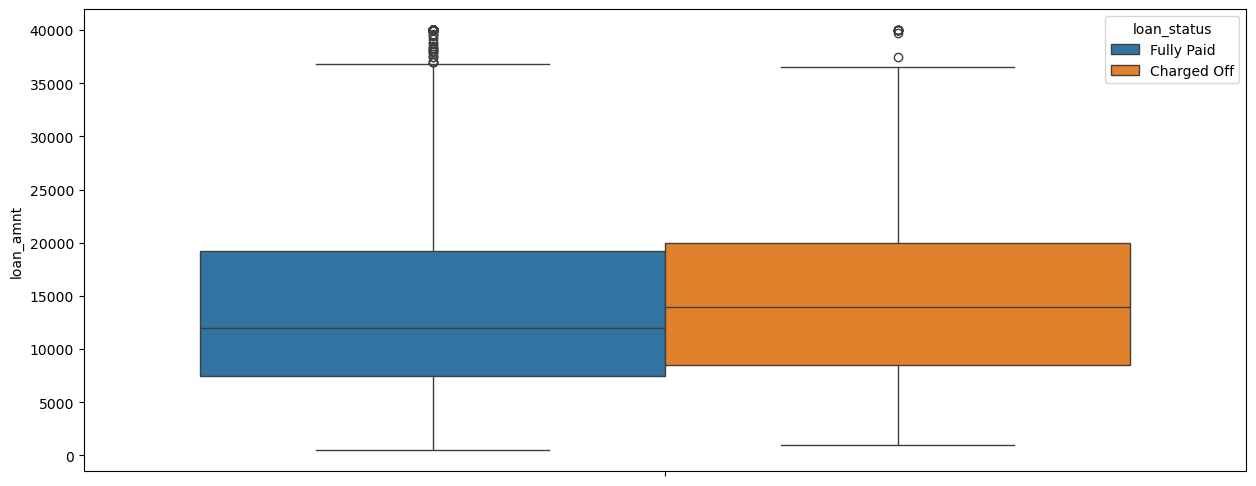

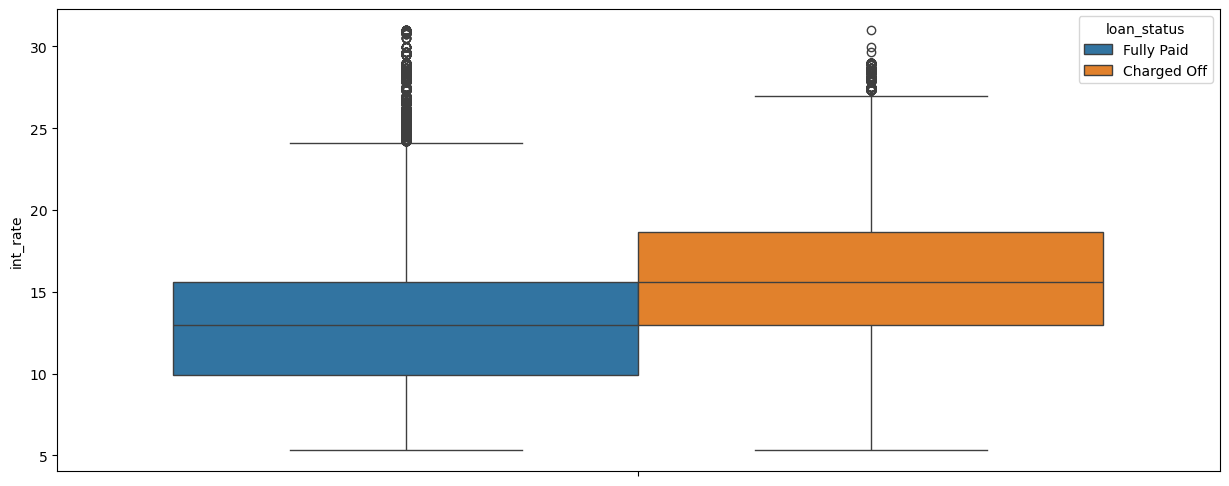

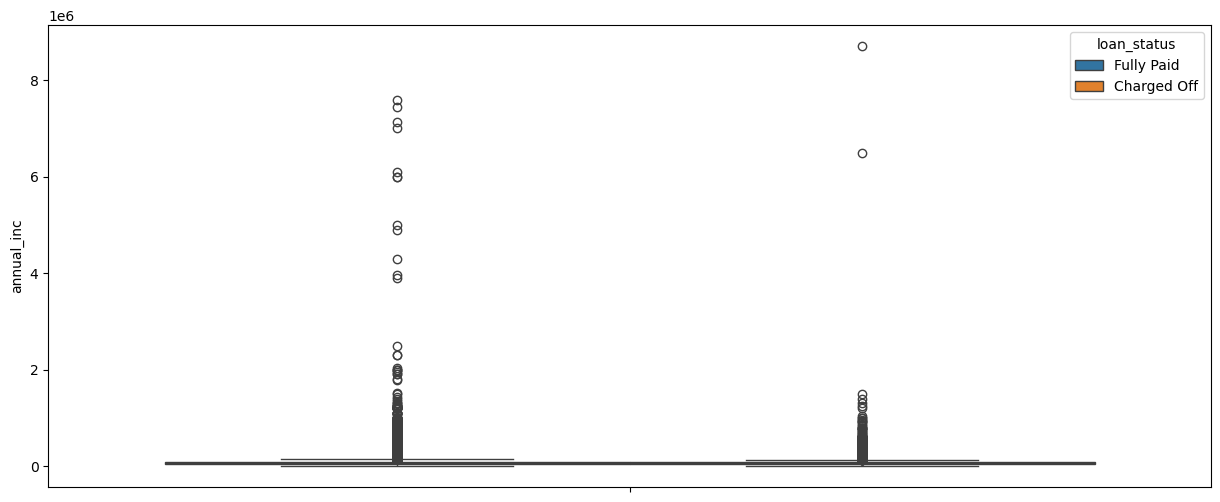

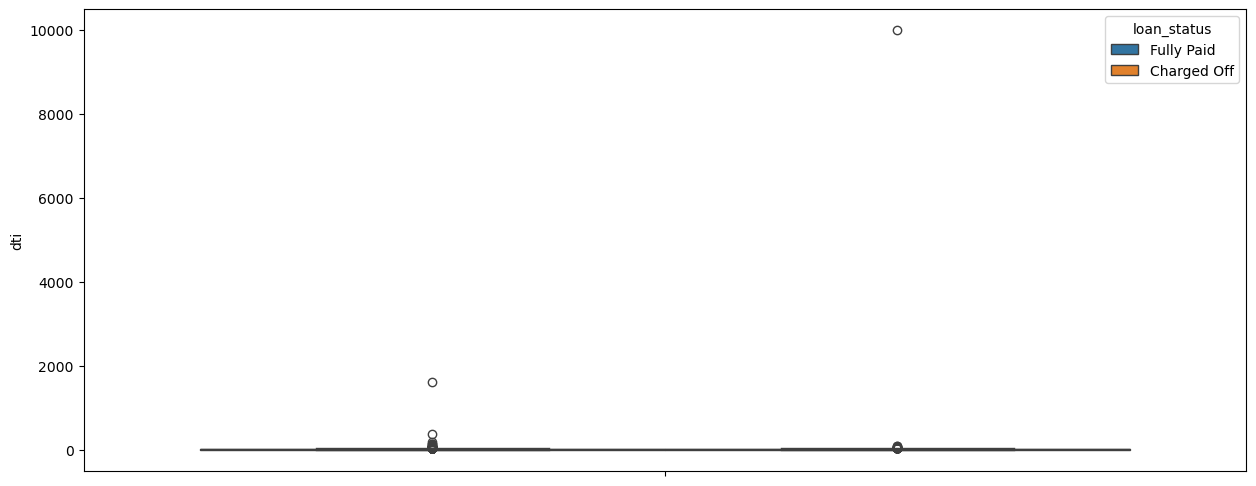

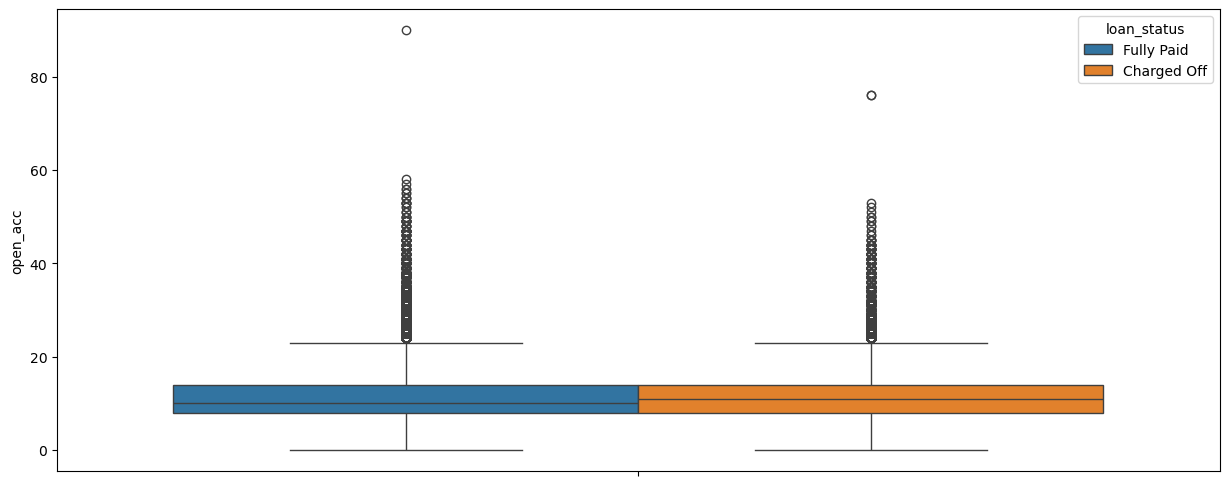

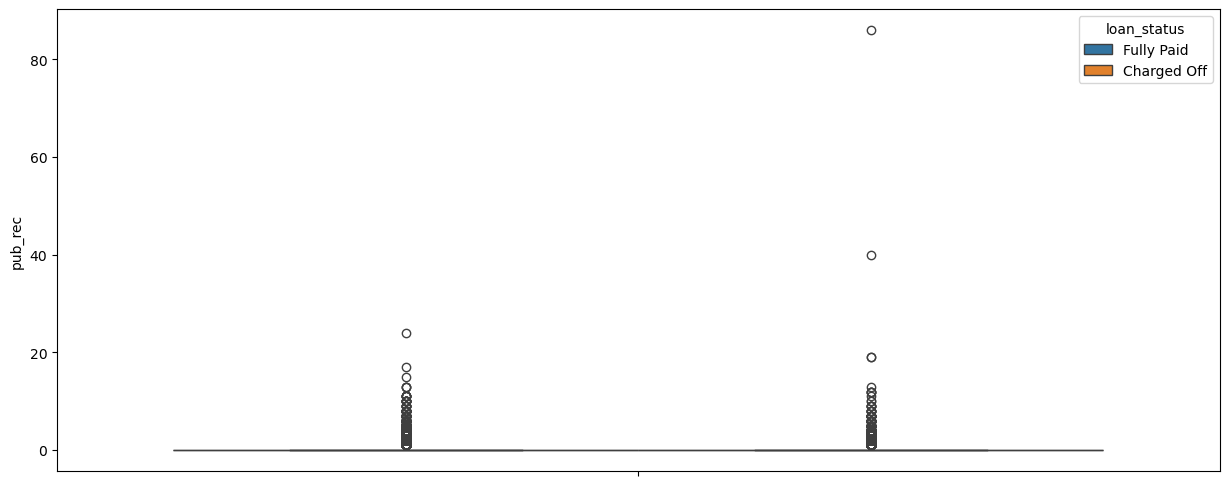

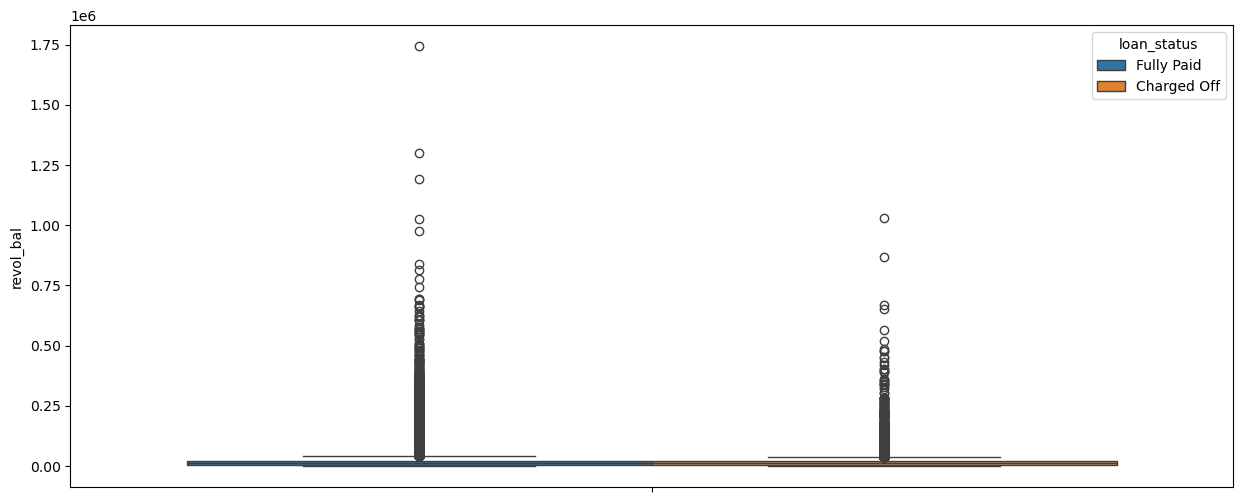

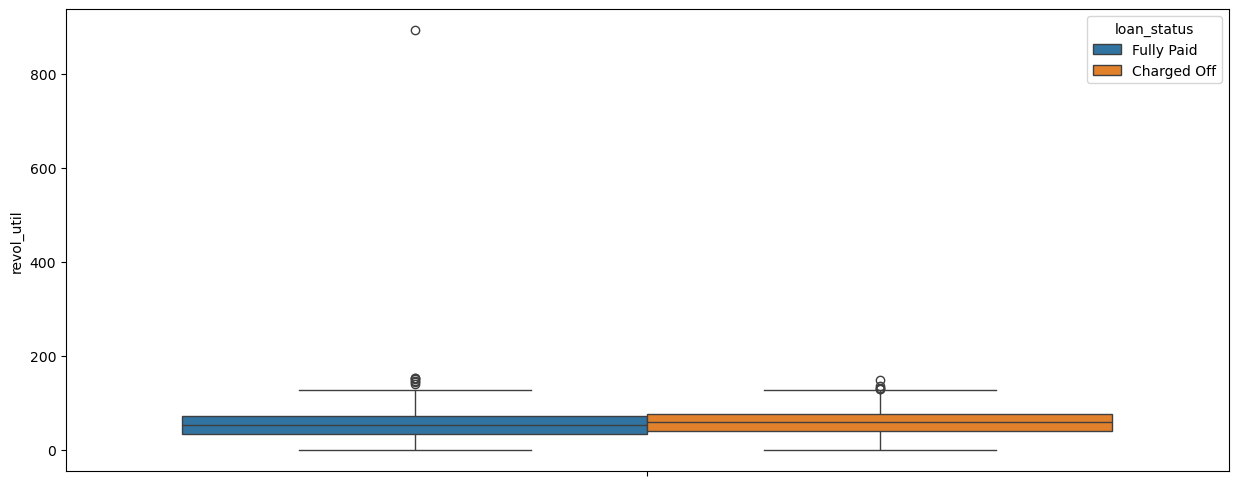

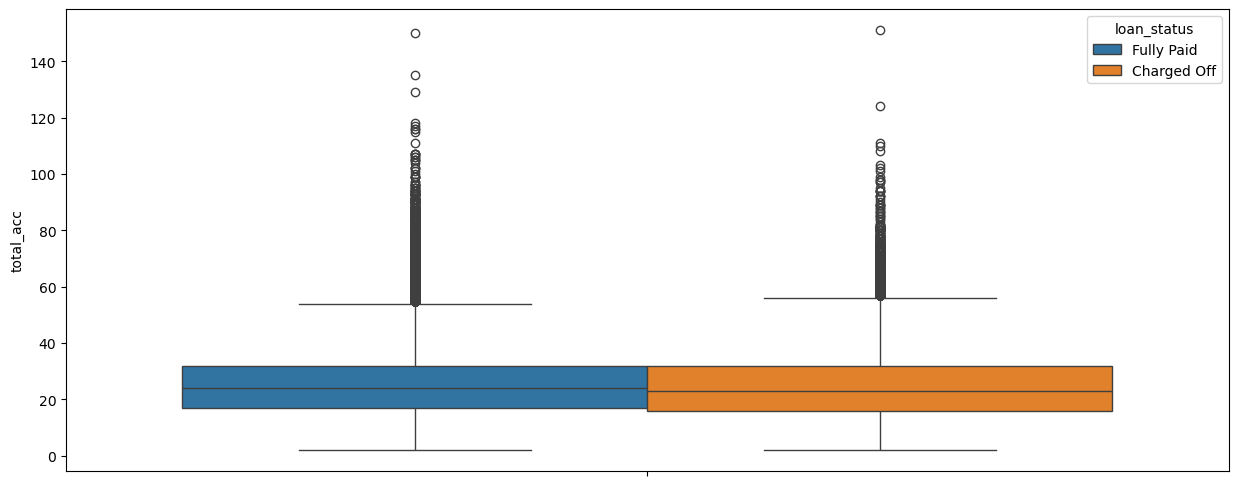

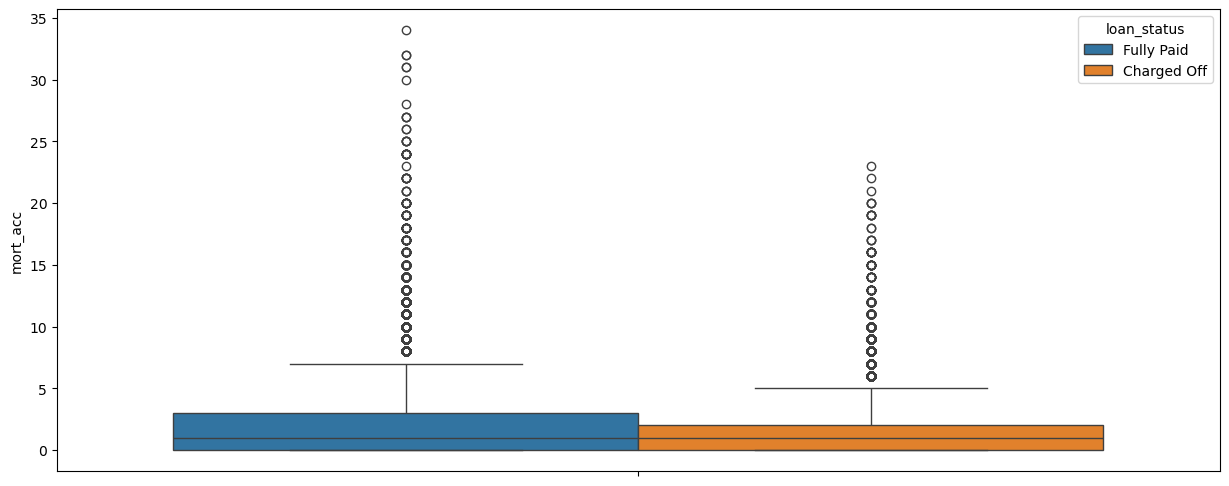

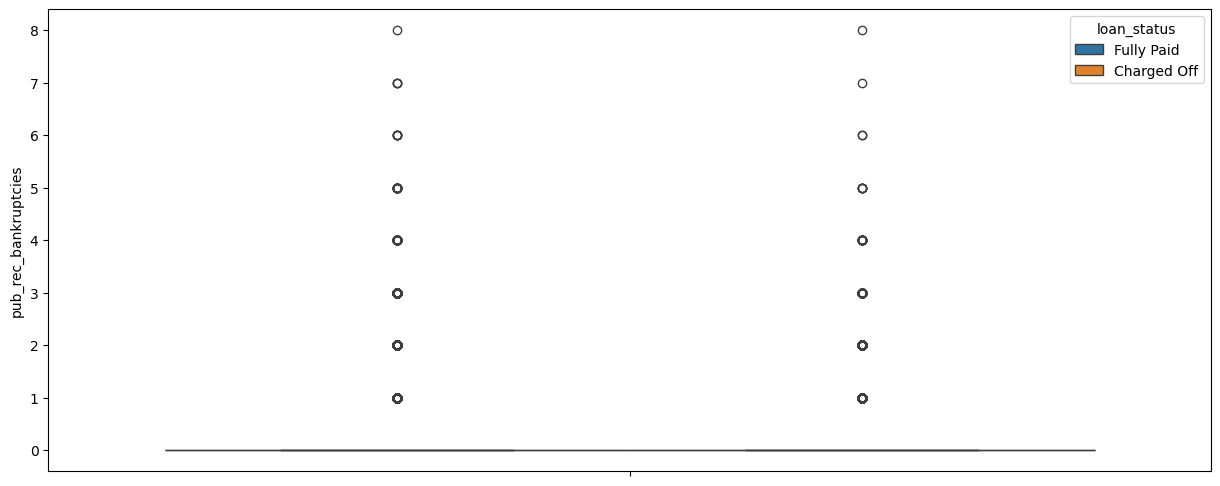

In [17]:
## Boxplot for numerical feature class wise
for i in df_corr.columns:
    plt.figure(figsize = (15,6))
    sns.boxplot(loan, y = df_corr[i],hue = "loan_status")
    plt.show() 

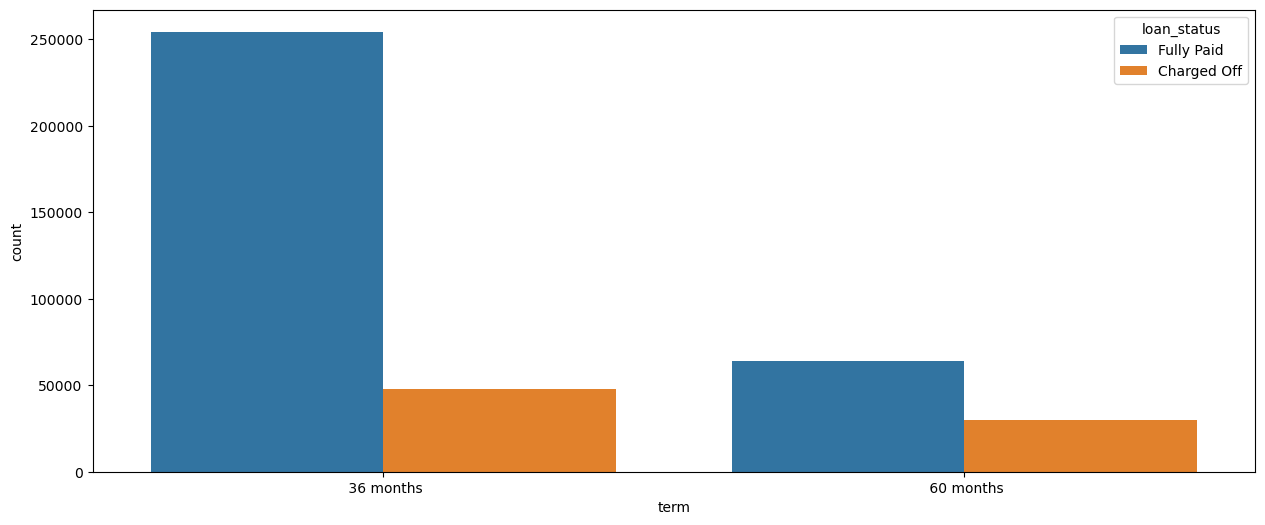

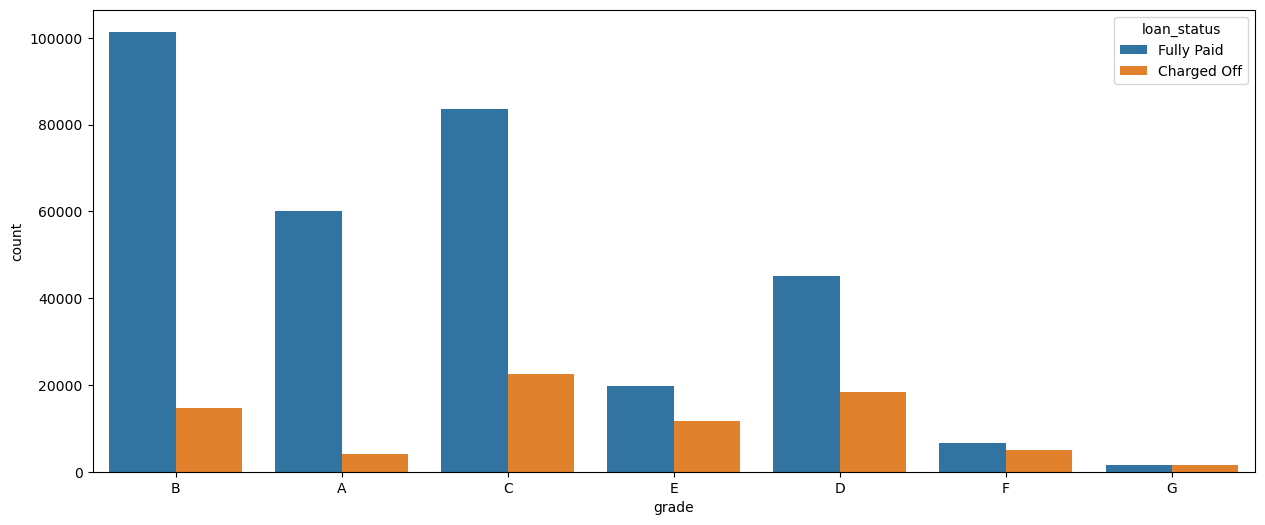

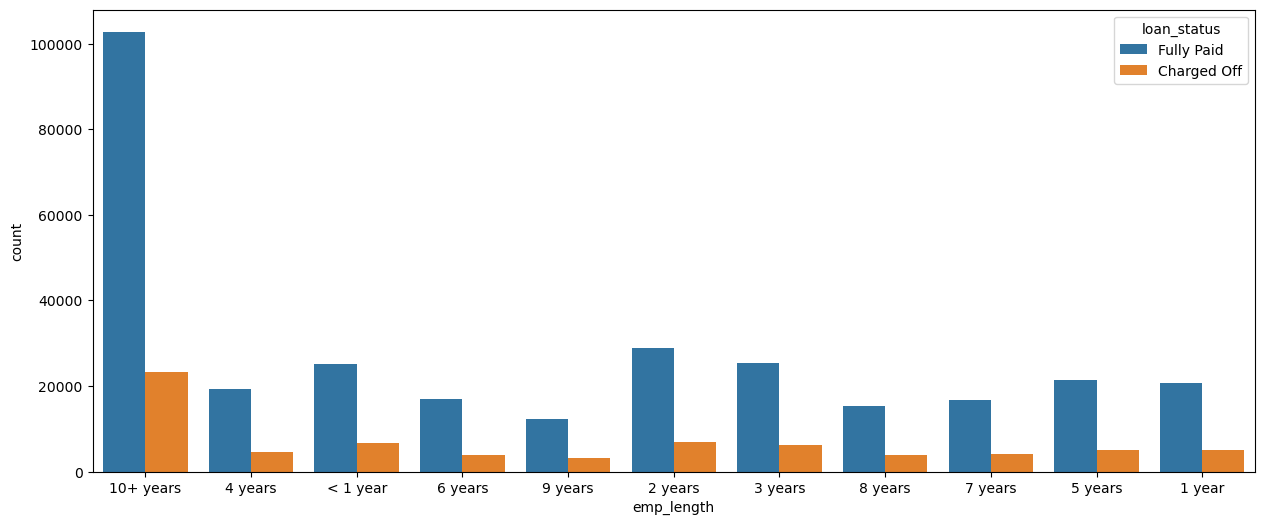

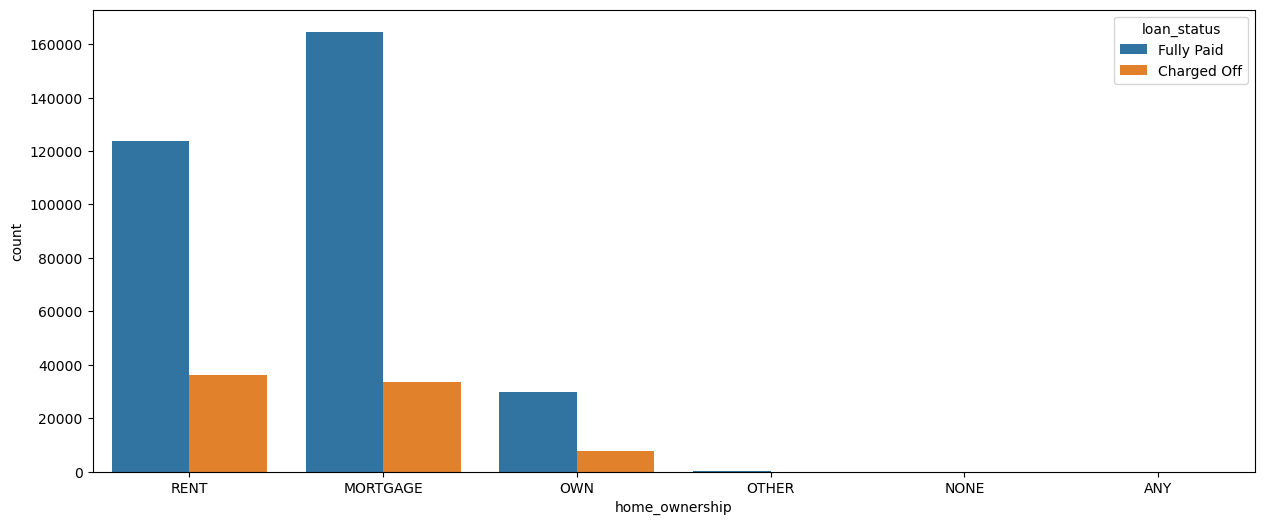

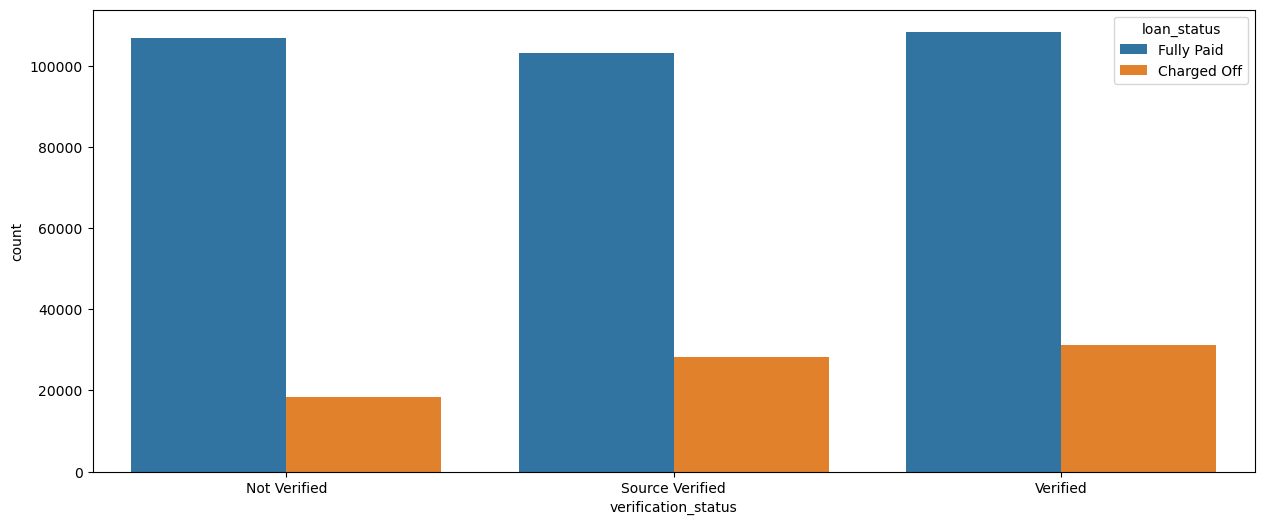

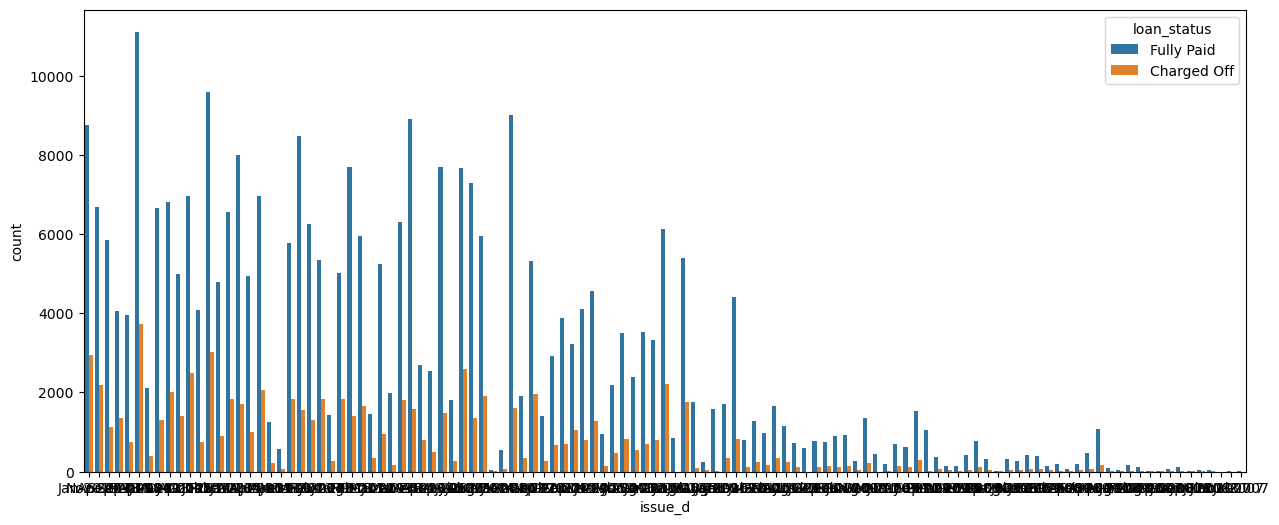

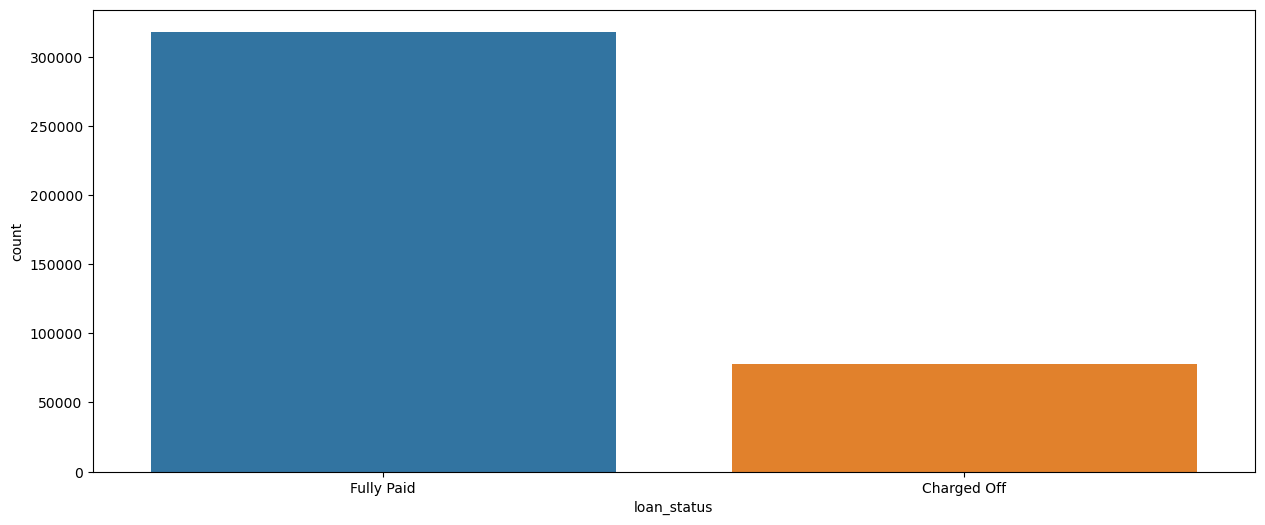

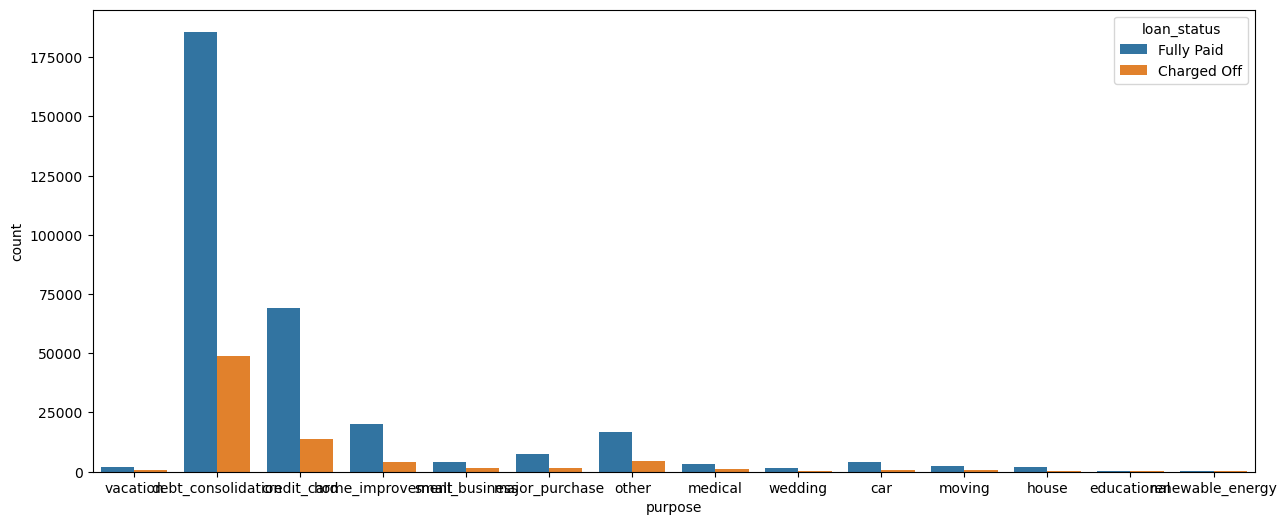

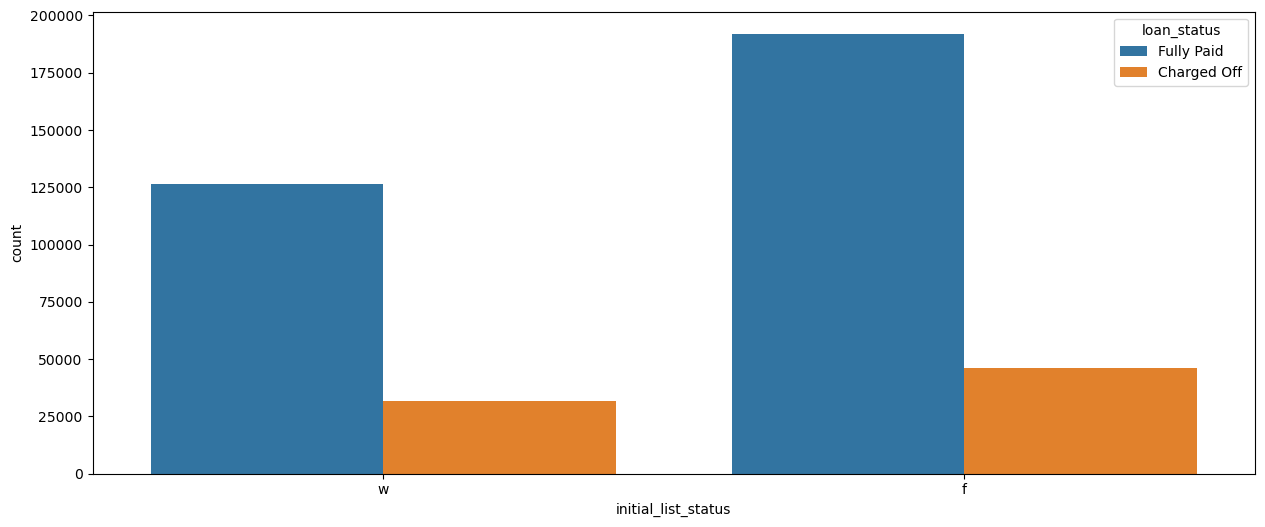

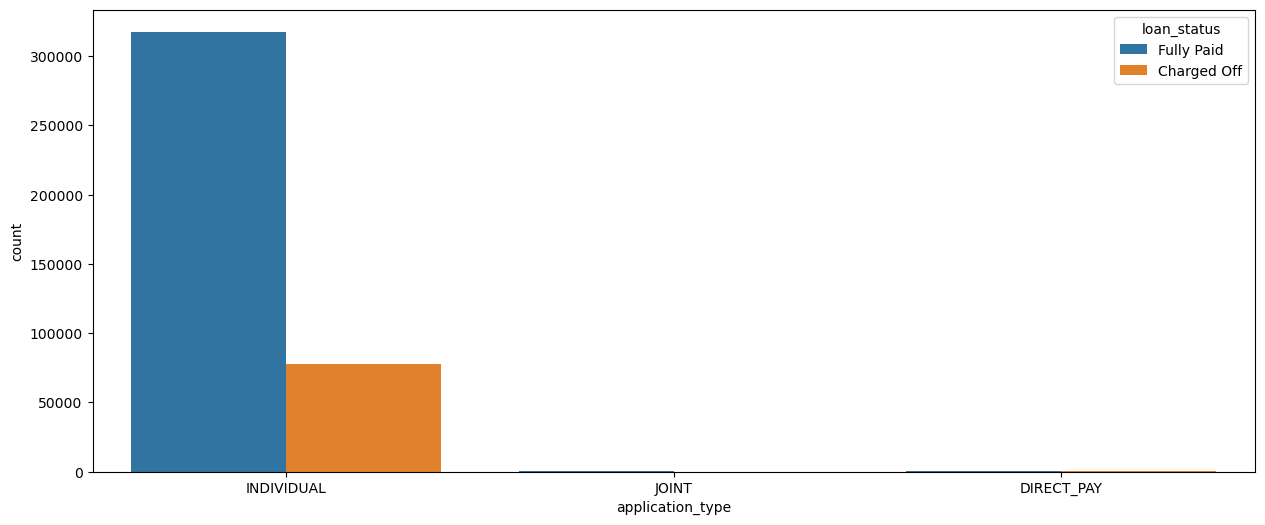

In [18]:
## Countplot for individual feature class wise
li = ['address','earliest_cr_line','sub_grade','emp_title','title']
for i in loan.select_dtypes(include = 'object').columns:
    if i not in li:
        plt.figure(figsize = (15,6))
        sns.countplot(loan, x = loan[i],hue = "loan_status")
        plt.show()

In [19]:
loan.title.value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

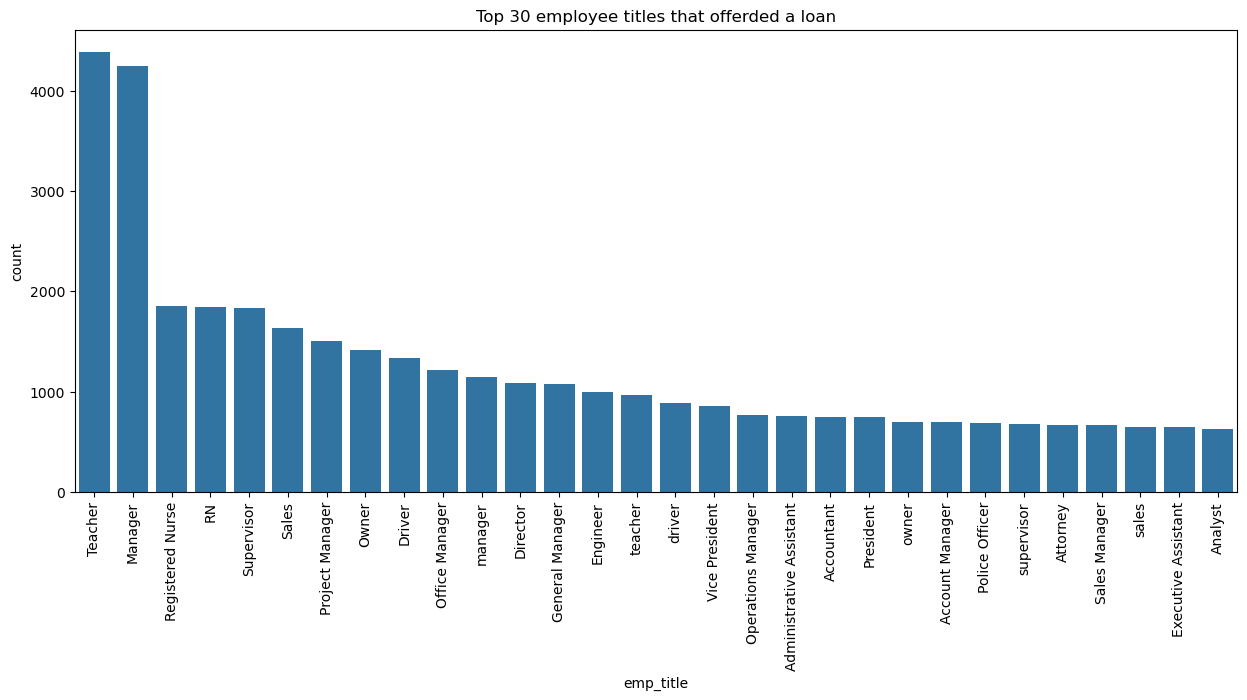

In [20]:
plt.figure(figsize = (15,6))
sns.barplot(loan["emp_title"].value_counts()[:30])
plt.xticks(rotation = 90)
plt.title("Top 30 employee titles that offerded a loan")
plt.show()

In [21]:
loan["pub_rec"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5.,  8.,  9., 10., 11.,  7., 19.,
       13., 40., 17., 86., 12., 24., 15.])

In [22]:
loan["mort_acc"].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [23]:
loan["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [24]:
loan.isnull().sum()/len(loan)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

### Mean Imputation 

In [26]:
loan[["mort_acc","pub_rec_bankruptcies"]]

,mort_acc,pub_rec_bankruptcies
0,0.0,0.0
1,3.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
396025,0.0,0.0
396026,1.0,0.0
396027,0.0,0.0
396028,5.0,0.0


In [27]:
df = loan.groupby("total_acc")[loan.select_dtypes(include = 'float64').columns].mean()
df.drop("total_acc",axis =1,inplace = True)

In [28]:
df = df.reset_index()

In [29]:
dictio = dict(zip(df["total_acc"],df["mort_acc"]))

In [30]:
dictio

{2.0: 0.0,
 3.0: 0.05202312138728324,
 4.0: 0.0667433831990794,
 5.0: 0.10328947368421053,
 6.0: 0.15129310344827587,
 7.0: 0.22169531713100177,
 8.0: 0.30842176563558366,
 9.0: 0.36549925484351714,
 10.0: 0.4291584233754375,
 11.0: 0.5265700483091788,
 12.0: 0.6180337405468296,
 13.0: 0.7221235238791932,
 14.0: 0.8034818530539982,
 15.0: 0.9401418178469473,
 16.0: 1.0074047954866008,
 17.0: 1.1512688671421463,
 18.0: 1.235884973673552,
 19.0: 1.3580128970623357,
 20.0: 1.4093803385618886,
 21.0: 1.5199317512021095,
 22.0: 1.6407356109572175,
 23.0: 1.7217944688874922,
 24.0: 1.8458673428956336,
 25.0: 1.9005057623745958,
 26.0: 1.9874138957394336,
 27.0: 2.1035730039700042,
 28.0: 2.1630495269894268,
 29.0: 2.2310434531265053,
 30.0: 2.3313858138581387,
 31.0: 2.3901044529961517,
 32.0: 2.4780095216504194,
 33.0: 2.5416821503778024,
 34.0: 2.589579158316633,
 35.0: 2.6506270049577134,
 36.0: 2.78726035868893,
 37.0: 2.7606275303643724,
 38.0: 2.8594635436343028,
 39.0: 2.8505976095617

In [31]:
loan.loc[loan["mort_acc"].isnull(),"mort_acc"]

22       NaN
25       NaN
32       NaN
41       NaN
62       NaN
          ..
395991   NaN
395995   NaN
396016   NaN
396021   NaN
396029   NaN
Name: mort_acc, Length: 37795, dtype: float64

In [32]:
loan.loc[loan["mort_acc"].isnull(),"mort_acc"] = loan["total_acc"].map(dictio)

In [33]:
loan["mort_acc"]

0         0.000000
1         3.000000
2         0.000000
3         0.000000
4         1.000000
            ...   
396025    0.000000
396026    1.000000
396027    0.000000
396028    5.000000
396029    1.358013
Name: mort_acc, Length: 396030, dtype: float64

In [34]:
loan.isnull().sum()/len(loan)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [35]:
loan.shape

(396030, 26)

### Dropping rows with null value

In [37]:
loan.dropna(inplace = True)

In [38]:
loan.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [39]:
loan.shape

(370621, 26)

In [40]:
### We are only interested to know if derogatory,mortgage and bankruptcy exist or not

def converter(num):
    if num == 0:
        return 0.0
    else:
        return 1.0

In [41]:
loan["pub_rec"] = loan["pub_rec"].apply(converter)

In [42]:
loan["mort_acc"] = loan["mort_acc"].apply(converter)

In [43]:
loan["pub_rec_bankruptcies"] = loan["pub_rec_bankruptcies"].apply(converter)

In [44]:
loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [45]:
loan.isnull().sum()/len(loan)*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

In [46]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370621 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             370621 non-null  float64
 1   term                  370621 non-null  object 
 2   int_rate              370621 non-null  float64
 3   grade                 370621 non-null  object 
 4   sub_grade             370621 non-null  object 
 5   emp_title             370621 non-null  object 
 6   emp_length            370621 non-null  object 
 7   home_ownership        370621 non-null  object 
 8   annual_inc            370621 non-null  float64
 9   verification_status   370621 non-null  object 
 10  issue_d               370621 non-null  object 
 11  loan_status           370621 non-null  object 
 12  purpose               370621 non-null  object 
 13  title                 370621 non-null  object 
 14  dti                   370621 non-null  float64
 15  earli

### Outlier Treatment

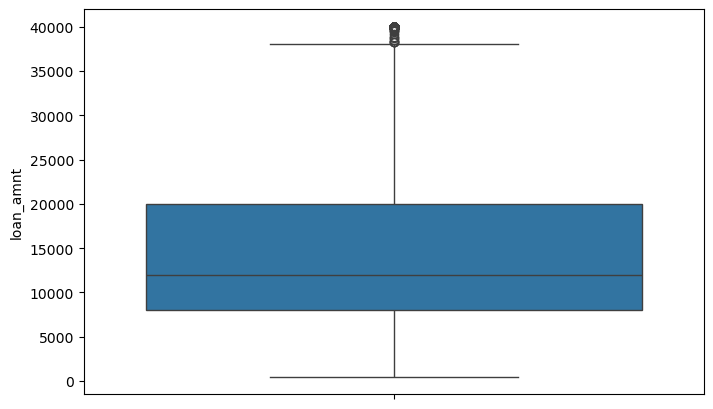

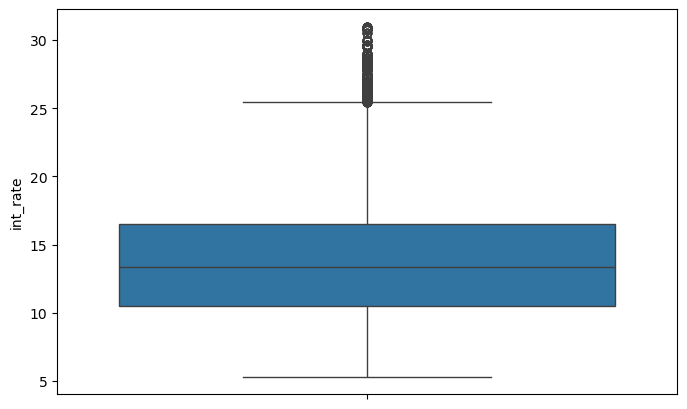

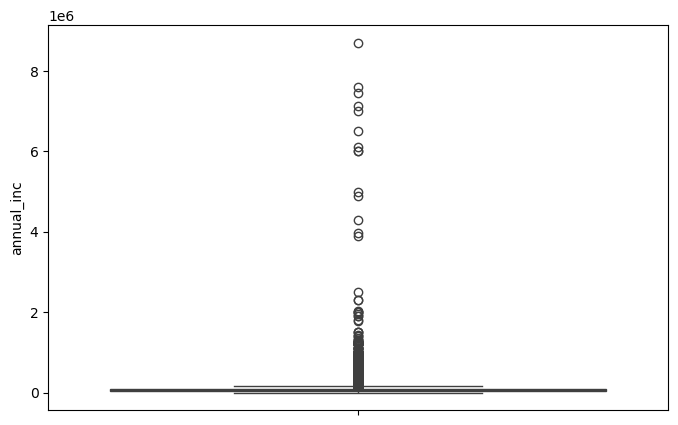

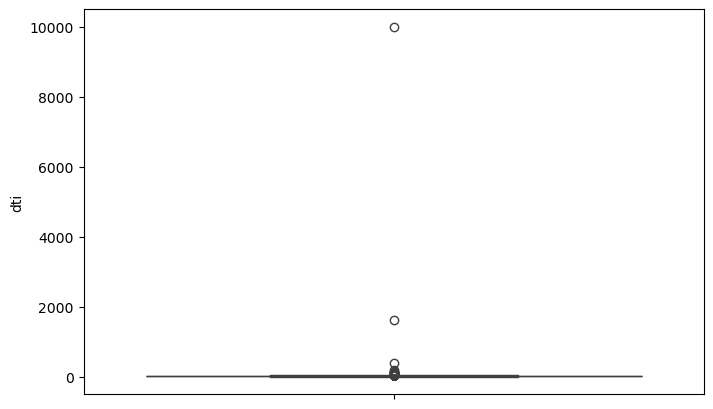

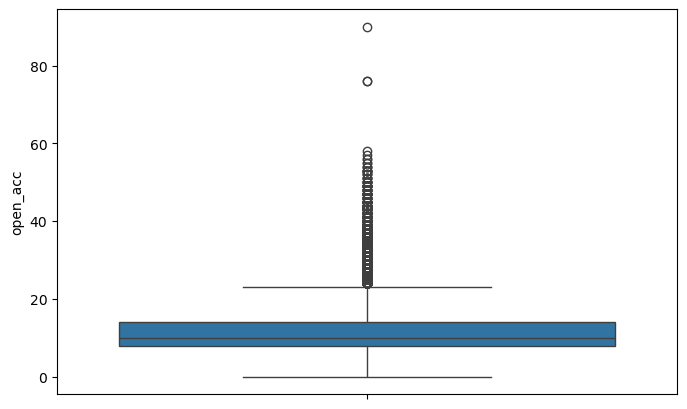

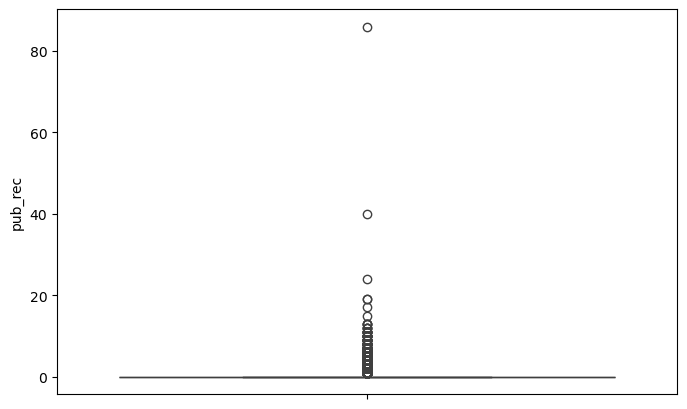

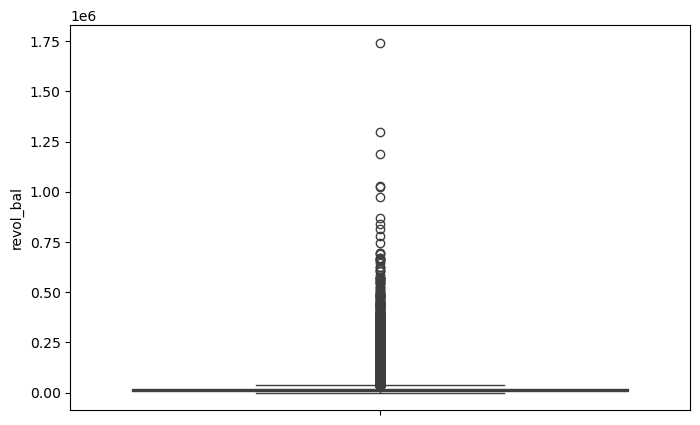

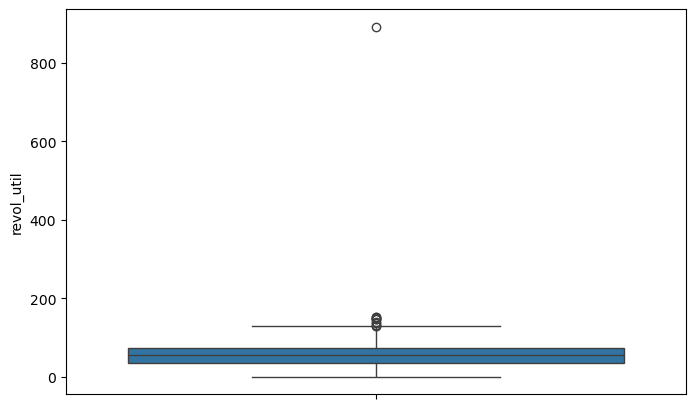

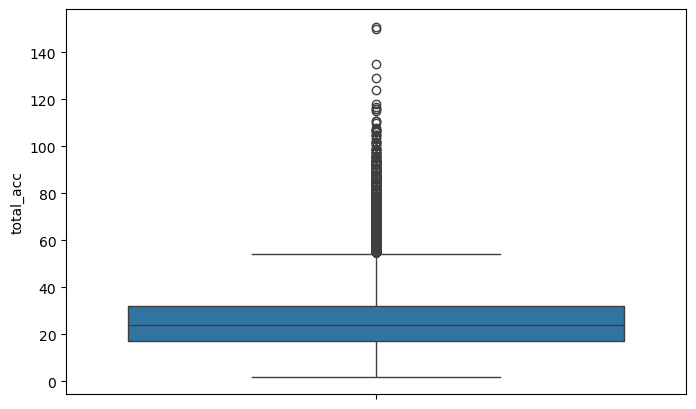

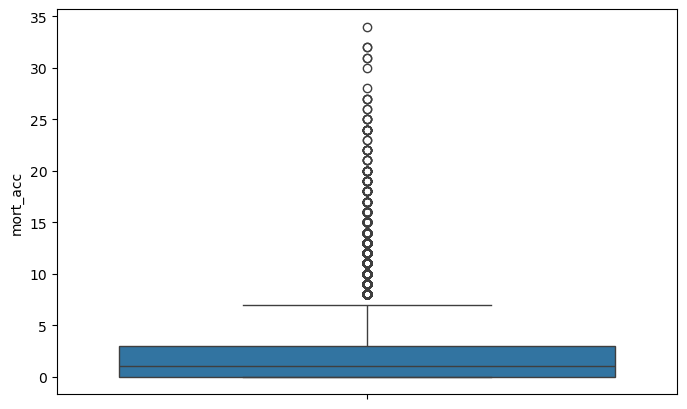

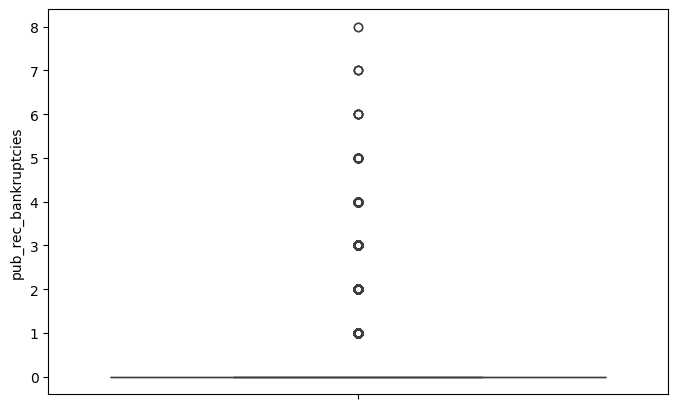

In [48]:
## Boxplot for individual features
for i in df_corr.columns:
    plt.figure(figsize = (8,5))
    sns.boxplot(loan, y = df_corr[i])
    plt.show()

In [49]:
iqr_1 = np.percentile(loan["loan_amnt"],1)
iqr_1

1600.0

In [50]:
iqr_99 = np.percentile(loan["loan_amnt"],99)
iqr_99

35000.0

In [51]:
iqr_25 = np.percentile(loan["loan_amnt"],25)
iqr_25

8000.0

In [52]:
iqr_75 = np.percentile(loan["loan_amnt"],75)
iqr_75

20000.0

In [53]:
iqr = iqr_75 - iqr_25
iqr

12000.0

In [54]:
lower_whisker = max(loan["loan_amnt"].min(),iqr_25 - 1.5*iqr)
lower_whisker

500.0

In [55]:
upper_whisker = min(loan["loan_amnt"].max(),iqr_75 + 1.5*iqr)
upper_whisker

38000.0

In [56]:
for i in loan.select_dtypes(include = "float64").columns:
    mean = loan[i].mean()
    std = loan[i].std()

    upper_limit = mean+3*std
    lower_limit = mean-3*std

    loan = loan[(loan[i]<upper_limit) & (loan[i]>lower_limit)]
    
    print(loan.shape)

(370449, 26)
(369760, 26)
(366887, 26)
(366720, 26)
(362143, 26)
(362143, 26)
(357295, 26)
(357282, 26)
(354518, 26)
(354518, 26)
(354518, 26)


In [57]:
loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [58]:
for i in loan.select_dtypes(include = 'object').columns:
    print(f"unique values_{i} : {loan[i].unique()},{loan[i].nunique()}")

unique values_term : [' 36 months' ' 60 months'],2
unique values_grade : ['B' 'A' 'C' 'E' 'D' 'F' 'G'],7
unique values_sub_grade : ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'A5' 'E4' 'C1' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G4' 'F2' 'G3' 'G5'],35
unique values_emp_title : ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc'],166872
unique values_emp_length : ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '7 years' '8 years' '5 years' '1 year'],11
unique values_home_ownership : ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'ANY' 'NONE'],6
unique values_verification_status : ['Not Verified' 'Source Verified' 'Verified'],3
unique values_issue_d : ['Jan-2015' 'Nov-2014' 'Apr-2013' 'Sep-2015' 'Sep-2012' 'Oct-2014'
 'Apr-2012' 'Jun-2013' 'Dec-2015' 'Oct-2012' 'Jul-2014' 'Feb-2013'
 'Oct-2015' 'Jan-2014' 'Mar-2016' 'Apr-2014' 'Jun-2011' 'Apr-2010'


In [59]:
loan.select_dtypes(include = 'object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [60]:
loan.earliest_cr_line

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 354518, dtype: object

In [61]:
loan["zip_code"] = loan["address"].apply(lambda x : x[-5:])

In [62]:
loan.drop(['issue_d','sub_grade','emp_title','title','earliest_cr_line','address'],axis = 1,inplace = True)

In [63]:
loan.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36 months,11.44,B,10+ years,RENT,117000.0,Not Verified,Fully Paid,vacation,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36 months,11.99,B,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,05113
2,15600.0,36 months,10.49,B,< 1 year,RENT,43057.0,Source Verified,Fully Paid,credit_card,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36 months,6.49,A,6 years,RENT,54000.0,Not Verified,Fully Paid,credit_card,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60 months,17.27,C,9 years,MORTGAGE,55000.0,Verified,Charged Off,credit_card,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650


In [64]:
for i in loan.select_dtypes(include = 'object').columns:
    print(f"unique values_{i} : {loan[i].unique()},{loan[i].nunique()}")

unique values_term : [' 36 months' ' 60 months'],2
unique values_grade : ['B' 'A' 'C' 'E' 'D' 'F' 'G'],7
unique values_emp_length : ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '7 years' '8 years' '5 years' '1 year'],11
unique values_home_ownership : ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'ANY' 'NONE'],6
unique values_verification_status : ['Not Verified' 'Source Verified' 'Verified'],3
unique values_loan_status : ['Fully Paid' 'Charged Off'],2
unique values_purpose : ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy'],14
unique values_initial_list_status : ['w' 'f'],2
unique values_application_type : ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY'],3
unique values_zip_code : ['22690' '05113' '00813' '11650' '30723' '70466' '29597' '48052' '86630'
 '93700'],10


In [65]:
loan_copy =loan.copy()
loan_copy.drop("emp_length",axis = 1, inplace = True)
loan_copy.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36 months,11.44,B,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36 months,11.99,B,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,05113
2,15600.0,36 months,10.49,B,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36 months,6.49,A,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60 months,17.27,C,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650


### Label Encoding

In [67]:
term_dict = {' 36 months' : 36,' 60 months' : 60}
loan_status_dict = {'Fully Paid' : 1,'Charged Off' : 0}
initial_list_status_dict = {'w' : 0,'f' : 1}

In [68]:
## label encoding
loan_copy["term"] = loan_copy["term"].map(term_dict)
loan_copy["loan_status"] = loan_copy["loan_status"].map(loan_status_dict)
loan_copy["initial_list_status"] = loan_copy["initial_list_status"].map(initial_list_status_dict)

In [69]:
loan_copy.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36,11.44,B,RENT,117000.0,Not Verified,1,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,0,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36,11.99,B,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,1,INDIVIDUAL,1.0,0.0,05113
2,15600.0,36,10.49,B,RENT,43057.0,Source Verified,1,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,1,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36,6.49,A,RENT,54000.0,Not Verified,1,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,1,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60,17.27,C,MORTGAGE,55000.0,Verified,0,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,1,INDIVIDUAL,1.0,0.0,11650


In [70]:
for i in loan_copy.select_dtypes(include = 'object').columns:
    print(f"unique values_{i} : {loan_copy[i].unique()},{loan_copy[i].nunique()}")

unique values_grade : ['B' 'A' 'C' 'E' 'D' 'F' 'G'],7
unique values_home_ownership : ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'ANY' 'NONE'],6
unique values_verification_status : ['Not Verified' 'Source Verified' 'Verified'],3
unique values_purpose : ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy'],14
unique values_application_type : ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY'],3
unique values_zip_code : ['22690' '05113' '00813' '11650' '30723' '70466' '29597' '48052' '86630'
 '93700'],10


### One hot Encoding

In [72]:
dummies = ['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
loan_copy = pd.get_dummies(loan_copy, columns=dummies, drop_first=True)

In [73]:
for col in loan_copy.columns:
    if loan_copy[col].dtype == bool:
        loan_copy[col] = loan_copy[col].astype(int)

In [74]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

loan_copy.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,117000.0,1,26.24,16.0,0.0,36369.0,41.8,25.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,8000.0,36,11.99,65000.0,1,22.05,17.0,0.0,20131.0,53.3,27.0,1,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,15600.0,36,10.49,43057.0,1,12.79,13.0,0.0,11987.0,92.2,26.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,7200.0,36,6.49,54000.0,1,2.60,6.0,0.0,5472.0,21.5,13.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,24375.0,60,17.27,55000.0,0,33.95,13.0,0.0,24584.0,69.8,43.0,1,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0


In [75]:
loan_copy.shape

(354518, 51)

### Scaling and Preprocessing

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,precision_recall_curve,roc_curve,roc_auc_score,auc
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [78]:
X = loan_copy.drop("loan_status",axis = 1)
Y = loan_copy["loan_status"]

In [79]:
### Oversampling on validation set
smt = SMOTE()
x_sm,y_sm = smt.fit_resample(X,Y)

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(x_sm,y_sm,test_size = 0.2,random_state = 42)

In [81]:
x_train_final,x_val,y_train_final,y_val = train_test_split(X_train,Y_train,test_size = 0.25,random_state = 42)

In [82]:
scaler = StandardScaler()
scaler.fit(x_train_final)

x_train_final = scaler.transform(x_train_final)
x_val = scaler.transform(x_val)
X_test = scaler.transform(X_test)

In [83]:
x_train_final.shape,y_train_final.shape

((343550, 50), (343550,))

### Model building (based on training and validation data)

In [85]:
model_val = LogisticRegression()
model_val.fit(x_train_final,y_train_final)

LogisticRegression()

In [86]:
model_val_predict = model_val.predict(x_train_final)

0.9067908601368069
              precision    recall  f1-score   support

           0       0.96      0.85      0.90    171782
           1       0.86      0.96      0.91    171768

    accuracy                           0.91    343550
   macro avg       0.91      0.91      0.91    343550
weighted avg       0.91      0.91      0.91    343550



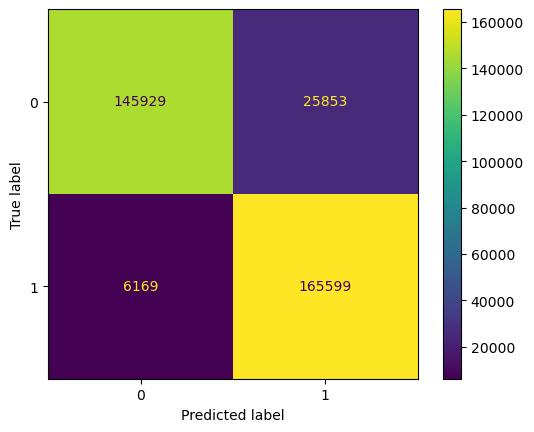

In [87]:
print(accuracy_score(y_train_final,model_val_predict))
conf_matrix = confusion_matrix(y_train_final,model_val_predict)
print(classification_report(y_train_final,model_val_predict))
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

In [88]:
y_val_predict = model_val.predict(x_val)

0.9070967629260285
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     57097
           1       0.87      0.96      0.91     57420

    accuracy                           0.91    114517
   macro avg       0.91      0.91      0.91    114517
weighted avg       0.91      0.91      0.91    114517



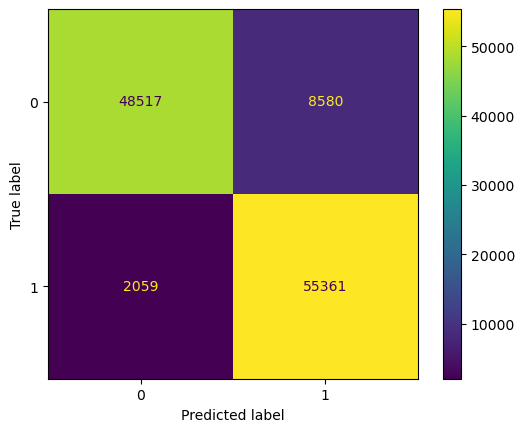

In [89]:
print(accuracy_score(y_val,y_val_predict))
conf_matrix = confusion_matrix(y_val,y_val_predict)
print(classification_report(y_val,y_val_predict))
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

### Hyperparameter Tuning

In [91]:
train_scores = []
val_scores = []
max_c = []
for la in np.arange(0.01, 5000.0, 100):
    model_val = LogisticRegression(C=1/la)
    model_val.fit(x_train_final,y_train_final)
    train_score = accuracy_score(y_train_final, model_val.predict(x_train_final))
    val_score = accuracy_score(y_val, model_val.predict(x_val))
    train_scores.append(train_score)
    val_scores.append(val_score)
    max_c.append(1/la)
print(max_c[np.argmax(val_scores)])

0.0016666388893518441


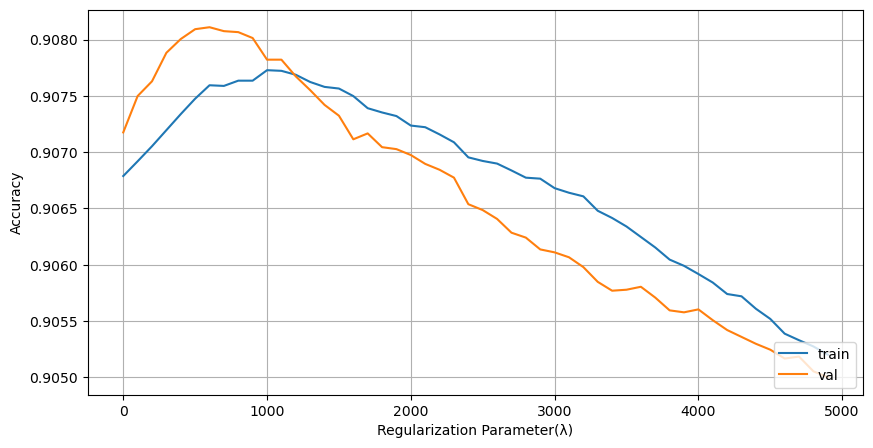

In [92]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

### Building model with best hyperparameter

In [94]:
model_val_tuned = LogisticRegression(C=max_c[np.argmax(val_scores)])
model_val_tuned.fit(x_train_final,y_train_final)

LogisticRegression(C=0.0016666388893518441)

In [95]:
y_val_predict = model_val_tuned.predict(x_val)

0.9081097129683803
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     57097
           1       0.87      0.96      0.91     57420

    accuracy                           0.91    114517
   macro avg       0.91      0.91      0.91    114517
weighted avg       0.91      0.91      0.91    114517



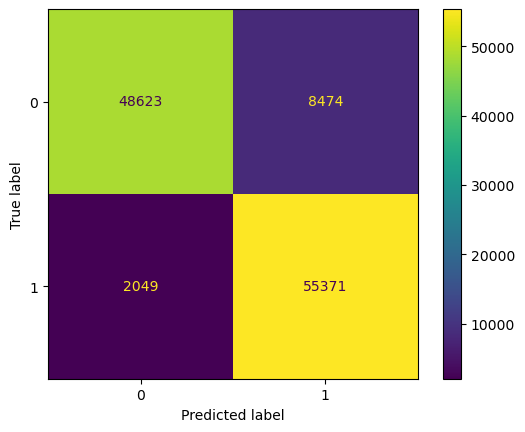

In [96]:
print(accuracy_score(y_val,y_val_predict))
conf_matrix = confusion_matrix(y_val,y_val_predict)
print(classification_report(y_val,y_val_predict))
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

In [97]:
y_test_predict = model_val_tuned.predict(X_test)

0.90770802588262
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     57413
           1       0.87      0.96      0.91     57104

    accuracy                           0.91    114517
   macro avg       0.91      0.91      0.91    114517
weighted avg       0.91      0.91      0.91    114517



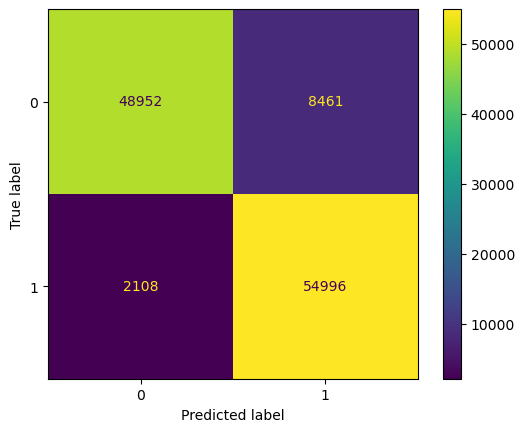

In [98]:
print(accuracy_score(Y_test,y_test_predict))
conf_matrix = confusion_matrix(Y_test,y_test_predict)
print(classification_report(Y_test,y_test_predict))
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

### ROC Curve

In [100]:
probability = model_val_tuned.predict_proba(X_test)

In [101]:
probability

array([[9.99874922e-01, 1.25077972e-04],
       [9.96905341e-01, 3.09465875e-03],
       [1.22655980e-01, 8.77344020e-01],
       ...,
       [3.59921514e-02, 9.64007849e-01],
       [6.85108799e-01, 3.14891201e-01],
       [9.97726213e-01, 2.27378728e-03]])

In [102]:
probabilites = probability[:,1]
probabilites

array([1.25077972e-04, 3.09465875e-03, 8.77344020e-01, ...,
       9.64007849e-01, 3.14891201e-01, 2.27378728e-03])

In [103]:
fpr, tpr, thr = roc_curve(Y_test,probabilites)

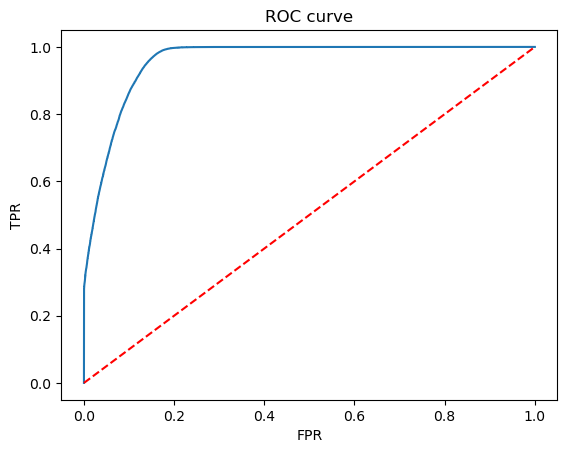

In [104]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [105]:
# AUC
roc_auc_score(Y_test,probabilites)

0.9587404395712266

#### An AUC score of 0.9587 means that model has a very high ability to distinguish between the positive and negative classes. In other words, the model performs very well, with 95.86% of the time being able to correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance.

### PR Curve

In [108]:
precision, recall, thr = precision_recall_curve(Y_test, probabilites)

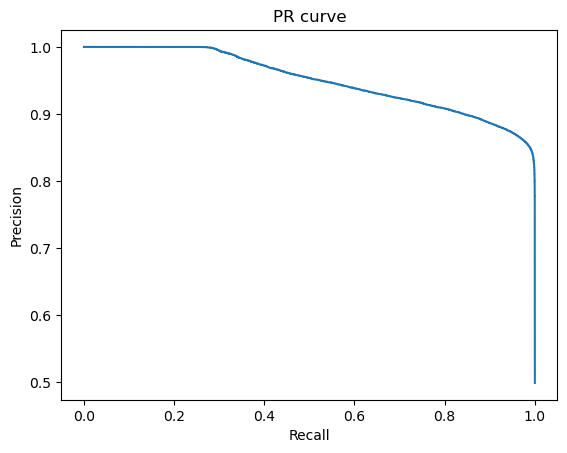

In [109]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [110]:
auc(recall, precision)

0.9504102045802018

#### AUC-PR score of 0.9504 indicates that model is very effective at identifying positive instances, even in the presence of class imbalance. It balances precision and recall very well, meaning it doesn't just find the positive instances, but it also makes sure that those predictions are correct.